In [4]:
11+2

13

In [5]:
# importing the different packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [6]:
#loading data
wine = pd.read_csv('winequality-red.csv',sep=",")

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##Checking wine quality in the distribution

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

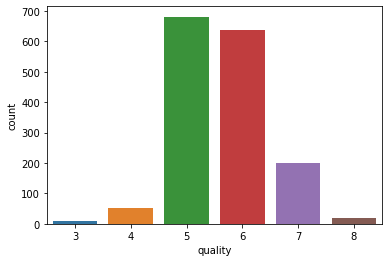

In [9]:
sns.countplot(wine['quality'])

In [10]:
bins = (2, 6, 8)
groups =["bad", "good"]
wine['quality'] = pd.cut(wine['quality'], bins= bins, labels=groups )

In [11]:
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [12]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [13]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

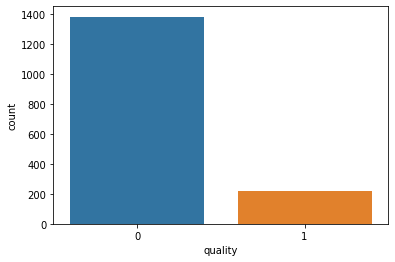

In [14]:
sns.countplot(x=wine['quality'])

###Separated the features X and the response variables Y

In [15]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [16]:
#Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Apply standard scalar to get optimized results

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train.shape

(1279, 11)

## Random Forest Classifier

In [19]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)

pred_rfc = rfc.predict(X_test)

In [20]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

##Lets see the performance

In [21]:
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [22]:
print(confusion_matrix(Y_test, pred_rfc))

[[265   8]
 [ 22  25]]


##SVM Classifier

In [23]:
clf=svm.SVC()
clf.fit(X_train, Y_train)
pred_clf = clf.predict(X_test)

###Let's see the performance

In [24]:
print(classification_report(Y_test, pred_clf))
print(confusion_matrix(Y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


##Neural Networks

In [25]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,5), max_iter=500)
mlpc.fit(X_train, Y_train)
pred_mlpc = mlpc.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
print(classification_report(Y_test, pred_mlpc))
print(confusion_matrix(Y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       273
           1       0.54      0.45      0.49        47

    accuracy                           0.86       320
   macro avg       0.72      0.69      0.70       320
weighted avg       0.85      0.86      0.86       320

[[255  18]
 [ 26  21]]


## Checking the accuracy

In [27]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(Y_test, pred_rfc)
print("The random forest classifier accuracy", cm)

cm = accuracy_score(Y_test, pred_clf)
print("The svm classifier accuracy", cm)

cm = accuracy_score(Y_test, pred_clf)
print("The neural network accuracy", cm)

The random forest classifier accuracy 0.90625
The svm classifier accuracy 0.875
The neural network accuracy 0.875


#Let's try predicing sth using our model

In [48]:
Xnew = [[7.4,	0.65,	0.00,	1.9,	0.076,	11.0,	18.0,	0.9978,	3.51,	0.56,	9.4]]
X2new = [[7.8,	0.58,	0.00,	2.0,	0.073,	11.0,	18.0,	0.9968,	3.36,	0.57,	9.5]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [49]:
Xnew = sc.transform(X2new)
ynew = rfc.predict(Xnew)
ynew

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

## Checking null values

In [51]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [52]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64